# Transfer Function

In this example we demonstrate how to use transfer functions in PathSim using the Pole-Residue-Constant (PRC) form. This representation is particularly convenient for transfer functions with complex poles.

You can also find this example as a single file in the [GitHub repository](https://github.com/milanofthe/pathsim/blob/master/examples/example_transferfunction.py).

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Apply PathSim docs matplotlib style
plt.style.use('../pathsim_docs.mplstyle')

from pathsim import Simulation, Connection
from pathsim.blocks import Source, Scope, TransferFunctionPRC
from pathsim.solvers import RKCK54

## Transfer Function Definition

The pole-residue-constant form represents a transfer function as:

$$\mathbf{H}(s) = \mathbf{C} + \sum_{i=1}^{n} \frac{\mathbf{R}_i}{s - p_i}$$

where:
- $\mathbf{C}$ is the constant term (direct feedthrough)
- $\mathbf{R}_i$ are the residues
- $p_i$ are the poles

Complex conjugate poles must come with corresponding complex conjugate residues to ensure a real-valued impulse response.

In [5]:
# Step delay for the input
tau = 5.0

# Simulation timestep
dt = 0.05

# Transfer function parameters
const = 0.0
poles = [-0.3, -0.05+0.4j, -0.05-0.4j, -0.1+2j, -0.1-2j]
residues = [-0.2, -0.2j, 0.2j, 0.3, 0.3]

This transfer function has:
- One real pole at $s = -0.3$
- Two pairs of complex conjugate poles at $s = -0.05 \pm 0.4j$ and $s = -0.1 \pm 2j$

The complex poles will produce oscillatory behavior in the step response.

In [8]:
# Blocks and connections
Sr = Source(lambda t: int(t >= tau))
TF = TransferFunctionPRC(Poles=poles, Residues=residues, Const=const)
Sc = Scope(labels=["step", "response"])

blocks = [Sr, TF, Sc]

connections = [
    Connection(Sr, TF, Sc), 
    Connection(TF, Sc[1]) 
]

In [10]:
# Initialize simulation
Sim = Simulation(blocks, connections, dt=dt, log=True, Solver=RKCK54)

2025-10-10 14:08:46,797 - INFO - LOGGING (log: True)
2025-10-10 14:08:46,798 - INFO - BLOCK (type: Source, dynamic: False, events: 0)
2025-10-10 14:08:46,798 - INFO - BLOCK (type: TransferFunctionPRC, dynamic: True, events: 0)
2025-10-10 14:08:46,798 - INFO - BLOCK (type: Scope, dynamic: False, events: 0)
2025-10-10 14:08:46,798 - INFO - GRAPH (size: 3, alg. depth: 1, loop depth: 0, runtime: 0.124ms)


Now let's run the simulation and plot the step response:

2025-10-10 14:08:49,696 - INFO - STARTING -> TRANSIENT (Duration: 100.00s)
2025-10-10 14:08:49,697 - INFO - TRANSIENT:   0% | elapsed: 00:00:00 (eta: --:--:--) | 0 steps (N/A steps/s)
2025-10-10 14:08:49,719 - INFO - TRANSIENT:  20% | elapsed: 00:00:00 (eta: --:--:--) | 197 steps (8815.8 steps/s)
2025-10-10 14:08:49,736 - INFO - TRANSIENT:  40% | elapsed: 00:00:00 (eta: --:--:--) | 319 steps (7550.1 steps/s)
2025-10-10 14:08:49,746 - INFO - TRANSIENT:  60% | elapsed: 00:00:00 (eta: --:--:--) | 397 steps (7391.1 steps/s)
2025-10-10 14:08:49,753 - INFO - TRANSIENT:  81% | elapsed: 00:00:00 (eta: --:--:--) | 452 steps (7529.5 steps/s)
2025-10-10 14:08:49,758 - INFO - TRANSIENT: 100% | elapsed: 00:00:00 (eta: --:--:--) | 491 steps (7265.5 steps/s)
2025-10-10 14:08:49,759 - INFO - TRANSIENT: 100% | elapsed: 00:00:00 (eta: --:--:--) | 491 steps (7843.6 avg steps/s)
2025-10-10 14:08:49,759 - INFO - FINISHED -> TRANSIENT (total steps: 491, successful: 334, runtime: 62.60 ms)


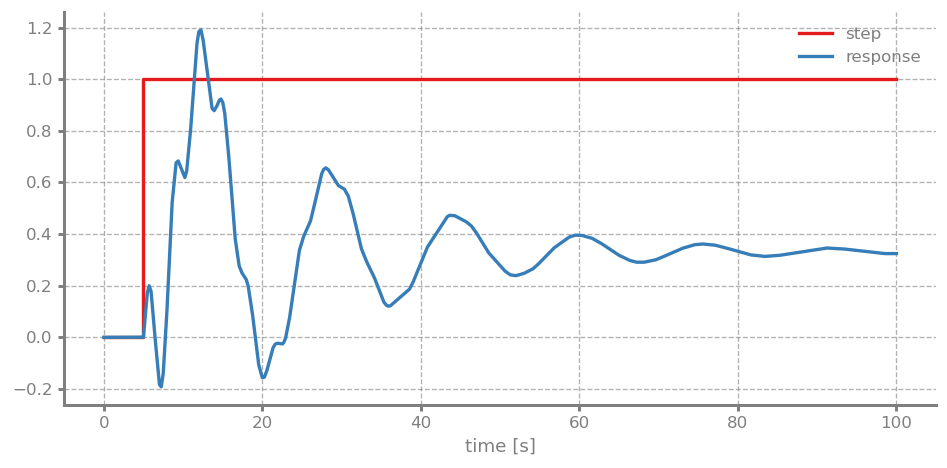

In [13]:
# Run simulation
Sim.run(100)

# Plot the results from the scope directly
Sc.plot()
plt.show()